<a href="https://colab.research.google.com/github/fabiorfc/Projeto-Alura-DataScience/blob/master/Forma%C3%A7%C3%A3o_Data_Science_Alura_An%C3%A1lise_explorat%C3%B3ria_do_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Atividade para conclusão da formação de Data Science
##Fábio Correa

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [128]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
#Link dos endereços dos dados
link_para_os_dados = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv"
#Carregando os dados
filmes = pd.read_csv(link_para_os_dados)
#Renomenado as colunas da base Filmes
filmes.columns = ["filmeId","titulo","generos"]
#Configurando filmeId como índice da tabela filmes
filmes = filmes.set_index(keys="filmeId")

In [130]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [131]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [132]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
#Link dos endereços dos dados
link_para_os_dados2 = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv"
#Carregando os dados
notas = pd.read_csv(link_para_os_dados2)
#Renomenado as colunas da base Filmes
notas.columns = ["usuarioId","filmeId","nota","momento"]

In [134]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
#Criando o DataFrame com as notas
media_das_notas = notas[["filmeId","nota"]].groupby("filmeId").mean()

#Combinando as tabela filmes e media_das_notas
filmes_com_notas = filmes.merge(right = media_das_notas, how="left", left_index=True, right_index=True)
#Renomeando as colunas
filmes_com_notas.columns = ["titulo","generos","ano_de_lancamento","nota_media"]

In [136]:
filmes = filmes_com_notas
del filmes_com_notas
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme
#Criando o DataFrame com as quantidade
quantidade_de_avaliacoes = notas[["filmeId","nota"]].groupby("filmeId").count()


In [0]:
# solução para criar a nova coluna e filtrar os filmes
#Combinando as tabela filmes e quantidade_de_avaliacoes
filmes_com_notas2 = filmes.merge(right = quantidade_de_avaliacoes, how="left", left_index=True, right_index=True)
#Renomeando as colunas
filmes_com_notas2.columns = ["titulo","generos","ano_de_lancamento","nota_media","total_de_votos"]

#Efetuando o filtro de dados
filmes_com_notas2_filtrado = filmes_com_notas2[filmes_com_notas2["total_de_votos"] > 49]

In [139]:
filmes = filmes_com_notas2_filtrado
del filmes_com_notas2_filtrado
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

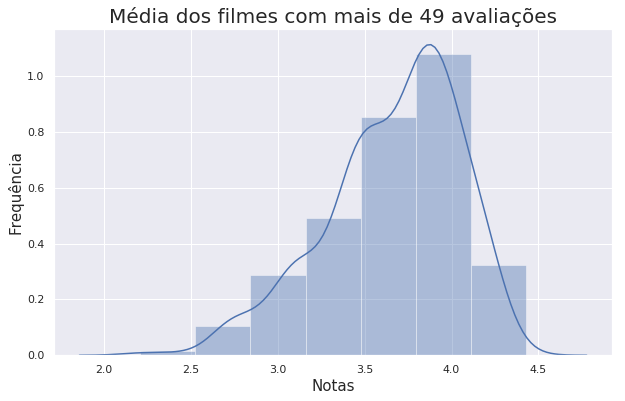

In [140]:
# solução histograma

#Importando as libraries de visualização
import seaborn as sns
import matplotlib.pyplot as plt

#Plotando os dados
sns.distplot(filmes["nota_media"], bins = 7)
plt.title("Média dos filmes com mais de 49 avaliações", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Frequência", size = 15)
plt.show()

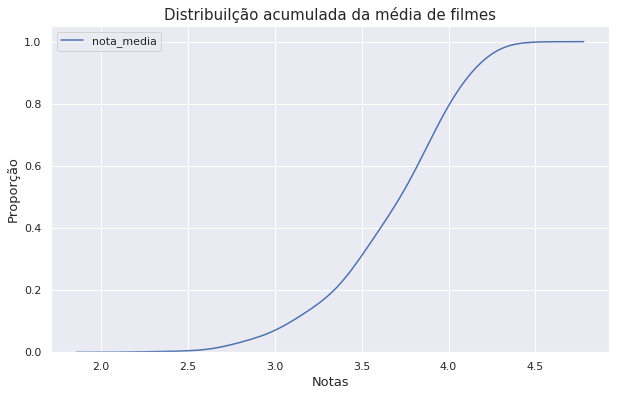

In [141]:
# solução cumulativa
#Plotando os dados
sns.kdeplot(filmes["nota_media"], cumulative=True)
plt.title("Distribuilção acumulada da média de filmes", size = 15)
plt.xlabel("Notas", size = 13)
plt.ylabel("Proporção", size = 13)
plt.show()

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

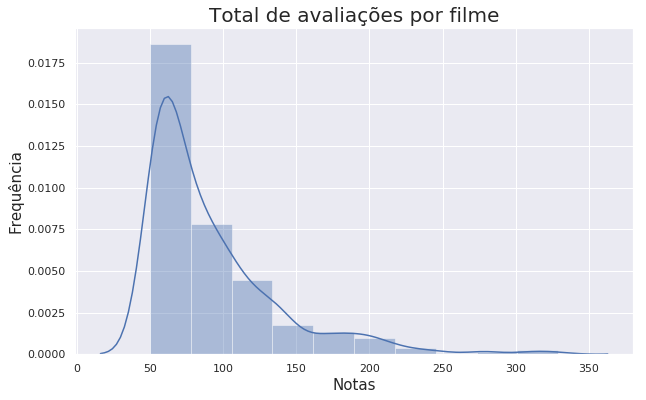

In [142]:
# solução histograma
#Plotando os dados
sns.distplot(filmes["total_de_votos"], bins = 10)
plt.title("Total de avaliações por filme", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Frequência", size = 15)
plt.show()

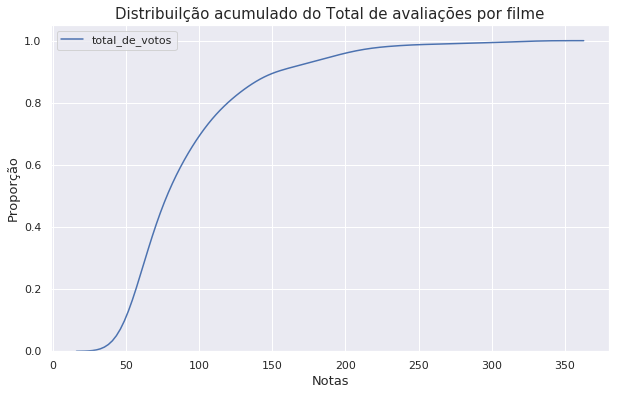

In [143]:
# solução cumulativa
#Plotando os dados
sns.kdeplot(filmes["total_de_votos"], cumulative=True)
plt.title("Distribuilção acumulado do Total de avaliações por filme", size = 15)
plt.xlabel("Notas", size = 13)
plt.ylabel("Proporção", size = 13)
plt.show()

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
#Importando numpy para trabalhar com álgebra linear
import numpy as np
nota_limite_dos_20_porcento = np.quantile(a=filmes["nota_media"], q=0.80)

In [145]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [146]:
#filmes.iloc[:,1]
#ilmes.loc[:,1] = filmes['generos'].str.replace('-','')
#filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [147]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

No handles with labels found to put in legend.


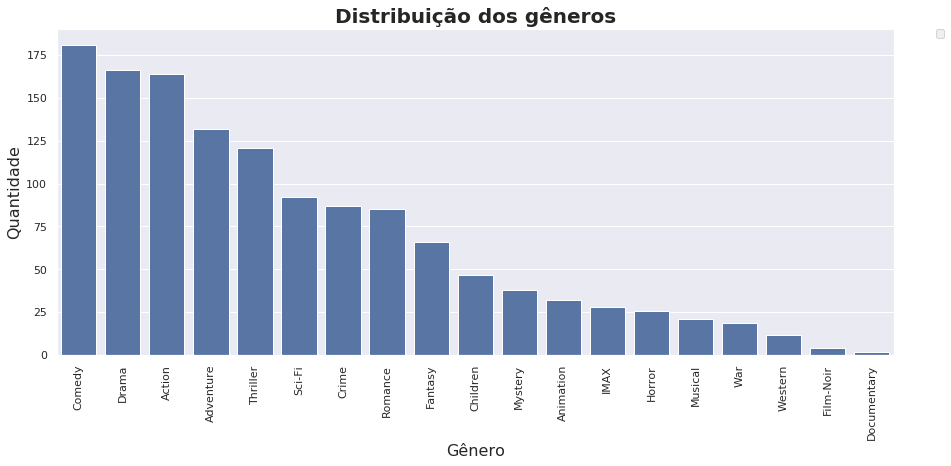

In [148]:
# solução
#Somando os generos
soma_dos_generos = generos.sum(axis=0)

#Organizando os dados
soma_dos_generos_ordenada = soma_dos_generos.sort_values(axis=0, ascending=False)
soma_dos_generos_ordenada = pd.DataFrame(soma_dos_generos_ordenada)
soma_dos_generos_ordenada = soma_dos_generos_ordenada.reset_index()
soma_dos_generos_ordenada.columns=['Generos','quantidade']
soma_dos_generos_ordenada

#Plotando os dados
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x = "Generos", y = "quantidade", data = soma_dos_generos_ordenada,color = "b",orient='v')
plt.xticks(rotation=90)

plt.title("Distribuição dos gêneros", fontweight='bold', size = 20)
plt.ylabel("Quantidade", size = 16)
plt.xlabel("Gênero", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes=soma_dos_generos_ordenada.head(5)
top5_generos_em_quantidade_de_filmes=top5_generos_em_quantidade_de_filmes.to_string(index=False)

In [150]:
print(top5_generos_em_quantidade_de_filmes)

   Generos  quantidade
    Comedy         181
     Drama         166
    Action         164
 Adventure         132
  Thriller         121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [151]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [152]:
# solucão
tabela_qtde_de_votos = votos_por_genero_por_filme.sum(axis=0)
tabela_qtde_de_votos = pd.DataFrame(tabela_qtde_de_votos)
tabela_qtde_de_votos = tabela_qtde_de_votos.reset_index()
tabela_qtde_de_votos.columns = ['Genero','Quantidade_de_votos']
tabela_qtde_de_votos = tabela_qtde_de_votos.sort_values(by='Quantidade_de_votos', ascending=False)

#Gerando uma prévia do resultado
print("Top 5 do resultado")
tabela_qtde_de_votos.head()

Top 5 do resultado


,Genero,Quantidade_de_votos
0,Action,15734.0
7,Drama,15445.0
4,Comedy,15330.0
1,Adventure,13117.0
16,Thriller,11907.0


No handles with labels found to put in legend.


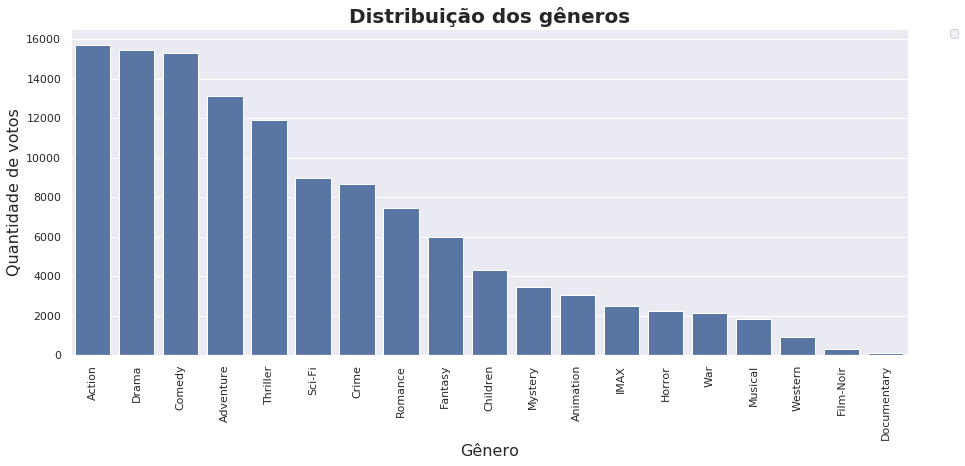

In [153]:
# solução
#Plotando os dados
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x = "Genero", y = "Quantidade_de_votos", data = tabela_qtde_de_votos,color = "b",orient='v')
plt.xticks(rotation=90)

plt.title("Distribuição dos gêneros", fontweight='bold', size = 20)
plt.ylabel("Quantidade de votos", size = 16)
plt.xlabel("Gênero", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [154]:
# solucao código
#Unindo as tabelas
tabela_unida = tabela_qtde_de_votos.merge(soma_dos_generos_ordenada, how='left', left_on='Genero',right_on='Generos')
tabela_unida = tabela_unida.iloc[:,[0,1,3]]
tabela_unida.columns=['Genero','Quantidade_de_votos','Quantidade_de_filmes']

#Calculo da quantidade de votos por genero
tabela_unida['votos_por_genero'] = round(tabela_unida['Quantidade_de_votos']/tabela_unida['Quantidade_de_filmes'],2)
#Ordenando os dados
tabela_unida=tabela_unida.sort_values(by='votos_por_genero', ascending=False)
#Top 5 da tabela final
tabela_unida.head()

,Genero,Quantidade_de_votos,Quantidade_de_filmes,votos_por_genero
14,War,2113.0,19,111.21
6,Crime,8649.0,87,99.41
3,Adventure,13117.0,132,99.37
4,Thriller,11907.0,121,98.40
5,Sci-Fi,8989.0,92,97.71


No handles with labels found to put in legend.


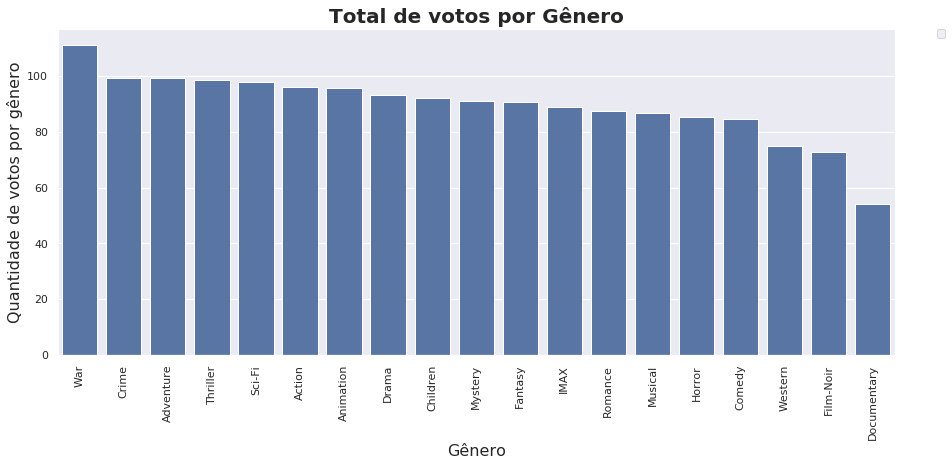

In [155]:
# solução com visualização 
#Plotando os dados
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x = "Genero", y = "votos_por_genero", data = tabela_unida,color = "b",orient='v')
plt.xticks(rotation=90)

plt.title("Total de votos por Gênero", fontweight='bold', size = 20)
plt.ylabel("Quantidade de votos por gênero", size = 16)
plt.xlabel("Gênero", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
Com base nos último gráficos, verifica-se que o Gênero War apresenta a maior quantidade de votos, por filmes. Já o Gênero Action, foi o mais votados dentro todos.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

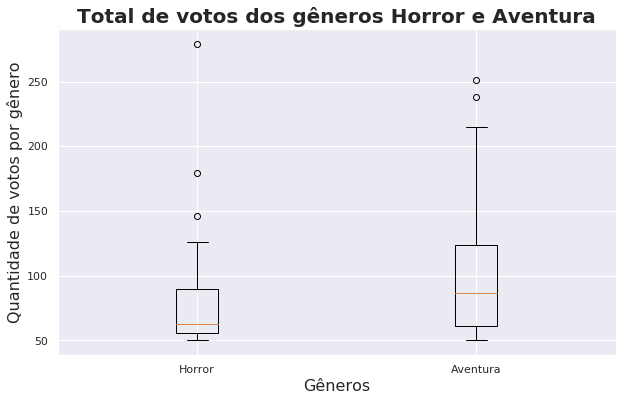

In [156]:
# solução:
#Gerando os objetos com os votos de Horror e Aventura
filmes_de_horror=filmes[filmes["Horror"]==1]
filmes_de_aventura=filmes[filmes["Adventure"]==1]

#plotando os gráficos
sns.set(rc={'figure.figsize':(10,6)})
plt.boxplot([filmes_de_horror["total_de_votos"],filmes_de_aventura["total_de_votos"]], labels=["Horror","Aventura"])
plt.title("Total de votos dos gêneros Horror e Aventura", fontweight='bold', size = 20)
plt.ylabel("Quantidade de votos por gênero", size = 16)
plt.xlabel("Gêneros", size = 16)
plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

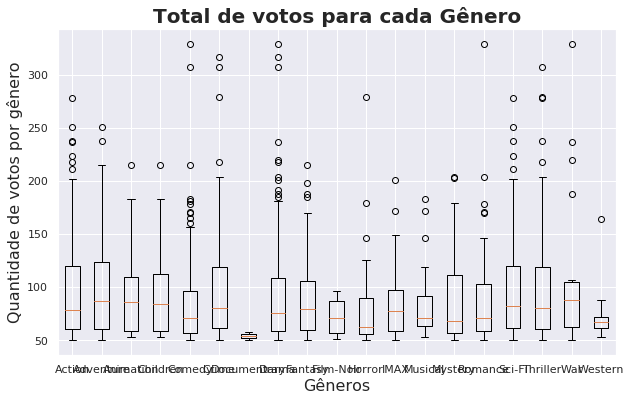

In [157]:
#Preparando os objetos
vetor_de_generos=generos.columns.values
lista_de_votos_por_genero=[]

#Filtrando os dados, por gênero
for i in range(len(vetor_de_generos)):
  #Vetor que armazena o genero da vez
  genero_da_vez=vetor_de_generos[i]
  #Filtro do filme
  filmes_da_vez=filmes[filmes[genero_da_vez]==1]
  #Armazenando o vetor de votos
  lista_de_votos_por_genero.append(filmes_da_vez["total_de_votos"])

#Plotando o gráfico
#sns.set(rc={'figure.figsize':(20,6)})
plt.boxplot(lista_de_votos_por_genero,labels=generos.columns.values)
plt.title("Total de votos para cada Gênero", fontweight='bold', size = 20)
plt.ylabel("Quantidade de votos por gênero", size = 16)
plt.xlabel("Gêneros", size = 16)
plt.show()


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
Com base nos boxplots de quantidade, percebe-se que o gênero Aventura possui um número de avaliações superior, comparado com Horror. Logo, considerando que o maior engajamento dos filmes indique a maior quantidade de bilheteria, pode-se concluir que os filmes do gênero Avengura possuem maior potencial para gerar maior faturamento.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

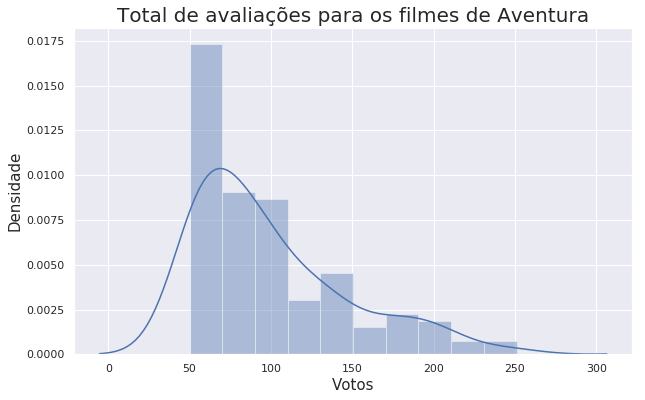

In [158]:
# solucao histograma de aventura
#Plotando os dados 
sns.distplot(filmes_de_aventura["total_de_votos"], bins = 10)
plt.title("Total de avaliações para os filmes de Aventura", size = 20)
plt.xlabel("Votos", size = 15)
plt.ylabel("Densidade", size = 15)
plt.show()

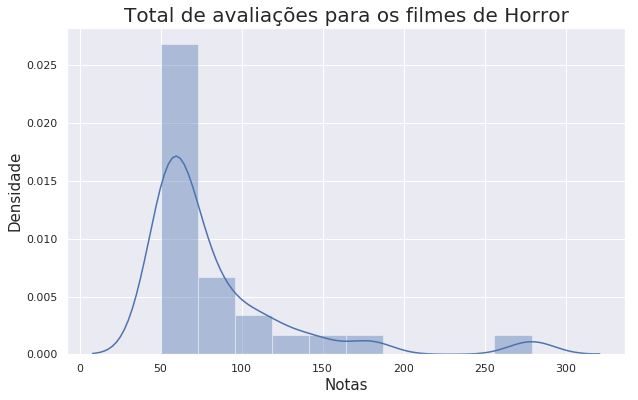

In [159]:
filmes["total_de_votos"]# solucao histograma de horror
sns.distplot(filmes_de_horror["total_de_votos"], bins = 10)
plt.title("Total de avaliações para os filmes de Horror", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Densidade", size = 15)
plt.show()

In [160]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

# APlicando o teste
stat, p = normaltest(filmes_de_horror["total_de_votos"])
print("Resultado do teste de normalidade para os filmes de Horror")
print("p-valor: {}".format(round(p,2)))
print("Estatística do teste: {}".format(round(stat)))
print("")

# APlicando o teste
stat, p = normaltest(filmes_de_aventura["total_de_votos"])
print("Resultado do teste de normalidade para os filmes de Aventura")
print("p-valor: {}".format(round(p,2)))
print("Estatística do teste: {}".format(round(stat)))


Resultado do teste de normalidade para os filmes de Horror
p-valor: 0.0
Estatística do teste: 32.0

Resultado do teste de normalidade para os filmes de Aventura
p-valor: 0.0
Estatística do teste: 24.0


In [161]:
# solução com o teste desejado
#Teste de Wilcoxon
#Import da library
from scipy.stats import ranksums
# Aplicando o teste
estatistica, p = ranksums(filmes_de_aventura["total_de_votos"], filmes_de_horror["total_de_votos"])
print("p-valor: {}".format(round(p,2)))
print("estatistica: {}".format(round(estatistica,2)))


p-valor: 0.05
estatistica: 1.98


### Solução (explique sua conclusão):
A partir dos histogramas e do teste de Normalidade, pode-se concluir que os dados referente ao total de votos para os filmes de Horror e Aventura não configuram uma distribuição normal, o que impossibilita a aplicação do teste T de Student. Sendo assim, o teste escolhido foi o não-paramétrico de wilcoxon.

Com base no resultado do teste não-paramétrico, pode-se rejeitar a hipótese nula, ou seja, que os dados provém da mesma distribuição. Essa evidência, somada à visualização do Boxplot de número de votos, nos leva a concluir que os filmes de Aventura apresenta um maior número de avaliações, comparado aos de Horror.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

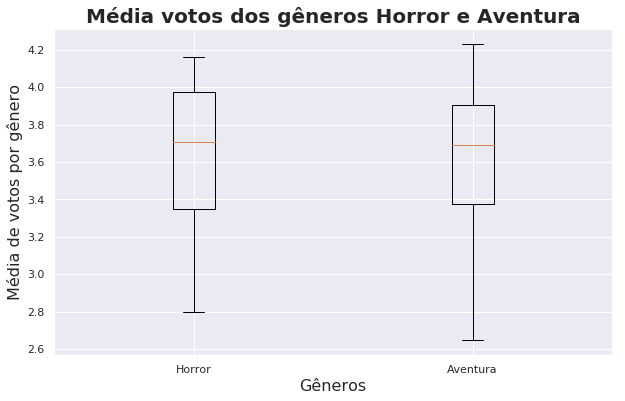

In [162]:
# solução:
#plotando os Boxplot de médias para os gêneros de Horror e aventura
sns.set(rc={'figure.figsize':(10,6)})
plt.boxplot([filmes_de_horror["nota_media"],filmes_de_aventura["nota_media"]], labels=["Horror","Aventura"])
plt.title("Média votos dos gêneros Horror e Aventura", fontweight='bold', size = 20)
plt.ylabel("Média de votos por gênero", size = 16)
plt.xlabel("Gêneros", size = 16)
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Com base no gráfico de Boxplot de notas média, os filmes de Horror e Aventura apresentam distribuições semelhantes. A única diferença que se percebe, visualmente, e a maior amplitude interquartil para o conjunto de filmes de Horror. Logo, não existem evidências que apontem qual dos dois gêneros apresenta maior aceitação da crítica.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

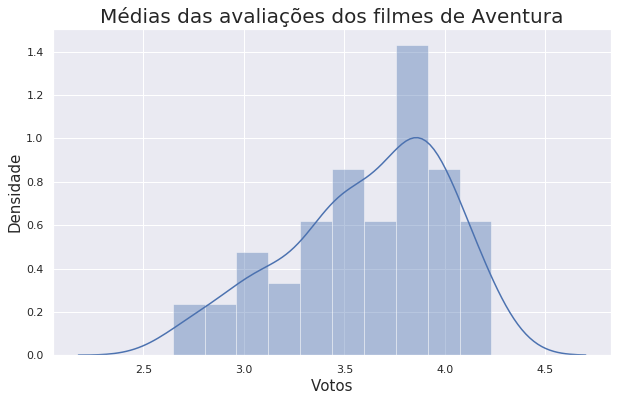

In [163]:
# solucao histograma de aventura
# solucao histograma de aventura
#Plotando os dados 
sns.distplot(filmes_de_aventura["nota_media"], bins = 10)
plt.title("Médias das avaliações dos filmes de Aventura", size = 20)
plt.xlabel("Votos", size = 15)
plt.ylabel("Densidade", size = 15)
plt.show()

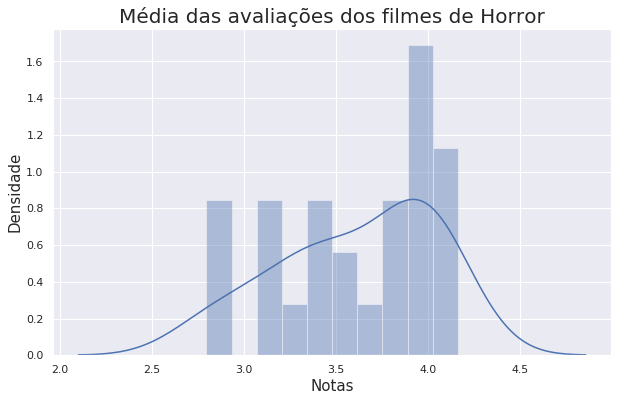

In [164]:
# solucao histograma de horror
filmes["total_de_votos"]# solucao histograma de horror
sns.distplot(filmes_de_horror["nota_media"], bins = 10)
plt.title("Média das avaliações dos filmes de Horror", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Densidade", size = 15)
plt.show()

In [165]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
# APlicando o teste
stat, p = normaltest(filmes_de_horror["nota_media"])
print("Resultado do teste de normalidade para os filmes de Horror")
print("p-valor: {}".format(round(p,2)))
print("Estatística do teste: {}".format(round(stat)))
print("")

# APlicando o teste
stat, p = normaltest(filmes_de_aventura["nota_media"])
print("Resultado do teste de normalidade para os filmes de Aventura")
print("p-valor: {}".format(round(p,2)))
print("Estatística do teste: {}".format(round(stat)))


Resultado do teste de normalidade para os filmes de Horror
p-valor: 0.21
Estatística do teste: 3.0

Resultado do teste de normalidade para os filmes de Aventura
p-valor: 0.01
Estatística do teste: 9.0


In [166]:
# solução com o teste desejado
#Teste de Wilcoxon
#Import da library
from scipy.stats import ranksums
# Aplicando o teste
estatistica, p = ranksums(filmes_de_aventura["nota_media"], filmes_de_horror["nota_media"])
print("p-valor: {}".format(round(p,2)))
print("estatistica: {}".format(round(estatistica,2)))

p-valor: 0.83
estatistica: -0.21


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Com base das análises dos histogramas e do teste de normalidade, verifica-se que apenas a distribuição das médias dos filmes de Aventura apresentam normalidade. Esse resultado impossibilita a aplicação do teste T para comparação des médias. Portanto, foi utilizado o teste de Wilcoxon.

A partir do p-valor de 0,83 gerado no teste de Wilcoxon, não temos evidências para rejeitar a hipótese nula, logo, concluímos que os dados provém das mesma distribuição. Portanto, quando comparamos os filmes de Horror e Aventura, não podemos dizer qual gênero apresentará maior sucesso de crítica.



## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Com base nas análises apresentadas para os gêneros de Horror e Aventura, verificou-se que o sucessos de crítica independe de um dos gêneros. A única influência que o gênero apresenta é no total de avaliações. 

Como pretende-se fazer um filmes que seja popular é interessante que o Gênero escolhido seja Aventura, pois ele apresentou maior número de avaliações comparado com Horror.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [0]:
#Atribuindo a tabela com o total de votos por gênero ao objeto votos_por_genero
votos_por_genero = tabela_unida

In [168]:
# solução: calculando os 2 generos mais votados
#top 5 gêneros mais votados (Já apresentado no gráfico de barras)
votos_por_genero.iloc[:,[0,3]].head(5)

,Genero,votos_por_genero
14,War,111.21
6,Crime,99.41
3,Adventure,99.37
4,Thriller,98.40
5,Sci-Fi,97.71


In [0]:
# solução: encontrando os top 5 filmes desses generos

#Gerando os objetos com os votos de Guerra e Crime
filmes_de_guerra=filmes[filmes["War"]==1]
filmes_de_crime=filmes[filmes["Crime"]==1]

In [170]:
#Top 5 filmes de Guerra melhor avaliados
tabela_filmes_de_guerra=filmes_de_guerra.iloc[:,[0,2]]
tabela_filmes_de_guerra=tabela_filmes_de_guerra.groupby("titulo").mean()
tabela_filmes_de_guerra=tabela_filmes_de_guerra.sort_values(by="nota_media", ascending=False)
tabela_filmes_de_guerra.head()

,nota_media
titulo,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041
Schindler's List (1993),4.225000
Apocalypse Now (1979),4.219626
Forrest Gump (1994),4.164134
Life Is Beautiful (La Vita è bella) (1997),4.147727


In [171]:
#Top 5 filmes de Crime melhor avaliados
tabela_filmes_de_crime=filmes_de_crime.iloc[:,[0,2]]
tabela_filmes_de_crime=tabela_filmes_de_crime.groupby("titulo").mean()
tabela_filmes_de_crime=tabela_filmes_de_crime.sort_values(by="nota_media", ascending=False)
tabela_filmes_de_crime.head()

,nota_media
titulo,
"Shawshank Redemption, The (1994)",4.429022
"Godfather, The (1972)",4.289062
Fight Club (1999),4.272936
"Godfather: Part II, The (1974)",4.259690
"Departed, The (2006)",4.252336


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [172]:
# solucao
#Separando os dados de notas e gêneros
filmes_e_generos = filmes.iloc[:,2:]
#Cálculo da matrix de correlação
filmes_e_generos = filmes_e_generos.corr()
filmes_e_generos = filmes_e_generos.iloc[2:,0]
filmes_e_generos = filmes_e_generos.sort_values(ascending=False)
#Organizando o objeto com os dados
filmes_e_generos = pd.DataFrame(filmes_e_generos[:2])
filmes_e_generos = filmes_e_generos.reset_index()
filmes_e_generos.columns = ["Gênero", "Valor de correlação"]

#Resposta
print("Os 2 gêneros que apresentam maiores valores de correlação com a nota média são: Drama e Crime.")
print("")
filmes_e_generos

Os 2 gêneros que apresentam maiores valores de correlação com a nota média são: Drama e Crime.



,Gênero,Valor de correlação
0,Drama,0.277662
1,Crime,0.190220


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [173]:
# solucao
#Separando os dados de notas e gêneros
filmes_e_generos = filmes.iloc[:,2:]
#Cálculo da matrix de correlação
filmes_e_generos = filmes_e_generos.corr()
filmes_e_generos = filmes_e_generos.iloc[2:,0]
filmes_e_generos = filmes_e_generos.sort_values(ascending=True)
#Organizando o objeto com os dados
filmes_e_generos = pd.DataFrame(filmes_e_generos[:2])
filmes_e_generos = filmes_e_generos.reset_index()
filmes_e_generos.columns = ["Gênero", "Valor de correlação"]

#Resposta
print("Os 2 gêneros que apresentam menores valores de correlação com a nota média são: Comédia e Ação.")
print("")
filmes_e_generos

Os 2 gêneros que apresentam menores valores de correlação com a nota média são: Comédia e Ação.



,Gênero,Valor de correlação
0,Comedy,-0.256005
1,Action,-0.154089


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

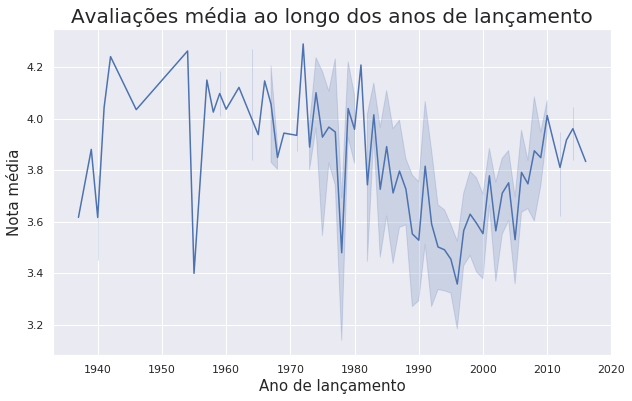

In [174]:
# solucao
#Preparando o objeto com os dados
ano_de_lancamento_e_nota = filmes.iloc[:,1:3]
ano_de_lancamento_e_nota

#Plotando o gráfico
sns.lineplot(x="ano_de_lancamento",y="nota_media", data=ano_de_lancamento_e_nota)
plt.title("Avaliações média ao longo dos anos de lançamento", size = 20)
plt.xlabel("Ano de lançamento", size = 15)
plt.ylabel("Nota média", size = 15)
plt.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [175]:
# solução (código)
#Cálculo da correlação
ano_de_lancamento_e_nota.corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)
O valor de correlação negativo indica que os filmes mais novos apresentam notas média inferior, quando comparados com os mais antigos. É importante ressaltar que a o valor de -0.15 para a correlação é bem próximo de zero, fato o qual não indica um grau de correlação muito forte.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

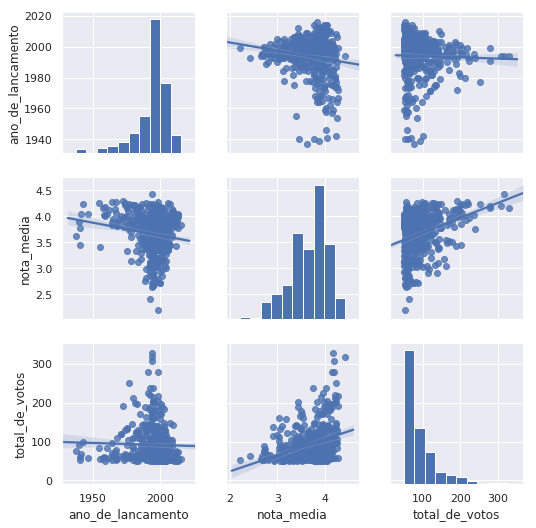

In [176]:
# solução
#Criando infos
infos = filmes.iloc[:,1:4]
#Plotando o gráfico
sns.pairplot(infos, kind="reg")
plt.show()

Analisando o pairplot:

****
**Total de votos**
* Para a variável de Total de votos, verifica que seu histograma apresenta um decaimento exponencial, o que indica um concentração de votos em uma pequena porção de filmes.
* Comparando o Scatter plot de total de Votos com a nota média, percebe uma relação linear positiva entre as duas variáveis, o que indica uma relação diretamente proporcional entre ambas. Apessar disso, nota-se que a dispersão dos pontos não apresenta uma regularidade, o que pode significar uma variância não constante e dificultaria, portanto, o ajuste de um modelo linear.
* O Scatter plot do Total de votos com o ano de lançamento não apresenta uma relação linear. Além disso, é possível notar que não existe uma regularidade entre os pontos das variáveis.
****
**Ano de lançamento**
* O histograma dos dados de ano de lançamento aparenta uma distribuição normal com assimentria à esquerda e mostra uma grande concentração de filmes lançados em torno dos anos 2000.
* Conforme já verificado, existe uma relação inversamente propocional entre nota média dos filmes e ano de lançamento. Apesar dessa interação, o valor de correlação não é muito alto.
****
**Média das notas**
* Observando o histograma de notas médias, verifica-se uma distribuição aparentemente normal, na qual a maior alocação de médias estão entre 3 e 4.

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

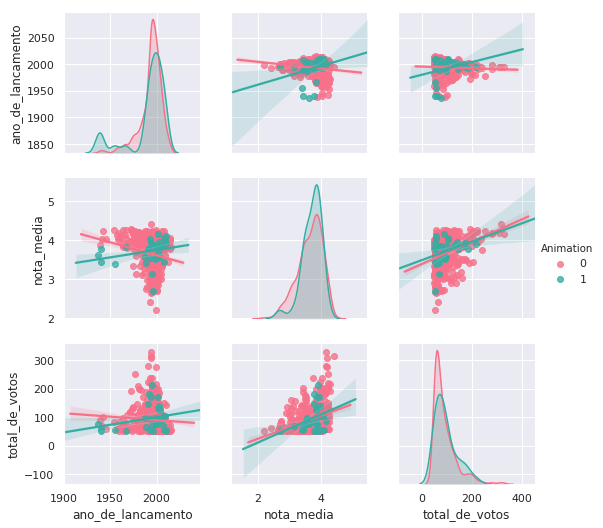

In [177]:
#Gerando a base de dados
base = filmes.iloc[:,[1,2,3,6]]

#Plotando o gráfico
sns.pairplot(base, kind="reg", hue="Animation", palette="husl", vars=["ano_de_lancamento","nota_media","total_de_votos"])
plt.show()


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

Comparando o grupo de filmes de Animação com os demais é possível constatar uma diferença na interação entre as variáveis Ano de Lançamento com Total de Votos e Nota média.

Diferentemente dos demais, os filmes de Animação apresentam uma relação diretamente proporcinal na interação entre as variáveis Ano de Lançamento com Total de Votos e Nota média, logo, temos evidência de que, quando se trata de um filme de animação, quanto mais novo é o filmes, maior é sua bilheteria e também sua nota média.

Mesmo apresentando relações diferentes, a relação diretamente proporcional entre Ano de lançamento com Total de Votos de nota média, não parece ser muito forte para os filmes de animação. Visualmente, as retas não apresentam uma inclinação muito alta o que configura a fraca interação.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução
"""# 2) Importando os dados"""

link_para_os_dados = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv"
link_para_os_dados2 = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv"
movies = pd.read_csv(link_para_os_dados)
ratings = pd.read_csv(link_para_os_dados2)


In [181]:
# 3) Verificando o conteúdo dos dados

#@title Verificando as colunas da base Movies
pd.DataFrame({"Base Movies":movies.columns})

#@title Top 5 da base Movies
movies.head()

#@title Dimensão da base
dimensao = movies.shape
print("A base de filmes possui: {} Linhas e {} colunas".format(dimensao[0], dimensao[1]))

#@title Verificando as colunas da base Ratings
pd.DataFrame({"Base Ratings": ratings.columns})

#@title Top 5 da base Movies
ratings.head()

#@title Dimensao da base ratings
dimensoes = ratings.shape
print("A base ratings possui {} avaliaçoes e {} colunas".format(dimensoes[0], dimensoes[1]))


A base de filmes possui: 9742 Linhas e 3 colunas
A base ratings possui 100836 avaliaçoes e 4 colunas


In [182]:
 4) Preparação da base para as análises

#@title Combinando as bases e gerando um nova tabela com a quantidade de avaliações para cada filme

# Criando uma tabela com a contagem ratings
ratings_agrupados = ratings.groupby("movieId").count()
# Unindo as duas tabelas
tabela_final = pd.merge(movies, ratings_agrupados, left_on="movieId", right_on="movieId", how="left")
tabela_final["qtd_avaliacoes"] = tabela_final["userId"] # Aqui os userId Estão sumarizados (Cada linha de filmes contem a contagem de votos)
tabela_final = tabela_final.drop(columns=["rating","timestamp","userId"])
# Verificando as base final
tabela_final.head()

#@title Avaliando se existem filmes que não foram avaliados

# Cálculo da quantidade de filmes não avaliados e total
qtde_filmes_nao_avaliados = sum(tabela_final["qtd_avaliacoes"].isna())
total_de_filmes = len(movies)

# Gerando os resultados
print("Não foram avaliados {} de {} filmes".format(qtde_filmes_nao_avaliados,total_de_filmes))

tabela_final[tabela_final["qtd_avaliacoes"].isna()].head(10)

Não foram avaliados 18 de 9742 filmes


,movieId,title,genres,qtd_avaliacoes
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**Análise**
---

Como existem filmes que não foram votados, iremos excluí-los da análise

In [183]:
#@title Combinando novamente a base, via 'inner' join, para retirar os filmes que nao foram votados

# Alterando o índice da base movies
#movies_indexados = movies.set_index("movieId")
#ratings_indexados = ratings.set_index("movieId")
# Criando uma tabela com a contagem ratings
#ratings_agrupados = ratings_indexados.groupby("movieId").count()
# Unindo as duas tabelas
tabela_final = pd.merge(movies, ratings_agrupados, left_on="movieId", right_on="movieId", how="inner")
tabela_final["qtd_avaliacoes"] = tabela_final["userId"] # Aqui os userId Estão sumarizados (Cada linha de filmes contem a contagem de votos)
tabela_final = tabela_final.drop(columns=["rating","timestamp","userId"])

# Checagem da quantidade de filmes da base
numero_de_filmes_avaliados = tabela_final["movieId"].drop_duplicates().count()
print("Foram analisados {} de {} filmes".format(numero_de_filmes_avaliados, total_de_filmes))

# Verificando a base final
tabela_final.head()


Foram analisados 9724 de 9742 filmes


,movieId,title,genres,qtd_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,110
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49


In [184]:
#@title Avaliando as estatísticas descritivas dos dados de quantidade de avaliações
media = round(tabela_final["qtd_avaliacoes"].mean(),1)
mediana = round(tabela_final["qtd_avaliacoes"].quantile(0.5))
quartil_01 = round(tabela_final["qtd_avaliacoes"].quantile(0.25))
quartil_03 = round(tabela_final["qtd_avaliacoes"].quantile(0.75))
percentil_95 = round(tabela_final["qtd_avaliacoes"].quantile(0.95))
percentil_05 = round(tabela_final["qtd_avaliacoes"].quantile(0.05))
coeficiente_de_variacao = tabela_final["qtd_avaliacoes"].std()/tabela_final["qtd_avaliacoes"].mean()
coeficiente_de_variacao = round(coeficiente_de_variacao*100,2)

print("-------------------------------------------------------------------------")
print("Percentil 05: {}".format(percentil_05))
print("percentil 25: {}".format(quartil_01))
print("Mediana: {}".format(mediana))
print("Média: {}".format(media))
print("Percentil 75 : {}".format(quartil_03))
print("Percentil 95: {}".format(percentil_95))
print("Coeficiente de variação: {}%".format(coeficiente_de_variacao))

-------------------------------------------------------------------------
Percentil 05: 1.0
percentil 25: 1.0
Mediana: 3.0
Média: 10.4
Percentil 75 : 9.0
Percentil 95: 47.0
Coeficiente de variação: 216.02%


**Análise**
---
Conforme pode-se verificar a Média e a Mediana apresentam valores bem discrepantes. Isso se deve à alta variabilidade dos dados, a qual pode ser mensurada pelo coeficiente de variação de valor igual a 216%.


Text(0.5, 1.0, 'Boxplot de Avaliações de filmes')

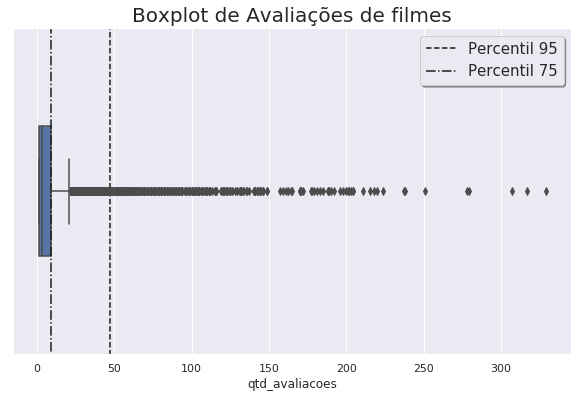

In [185]:
#@title Boxplot das avaliações dos filmes

ax = sns.boxplot(tabela_final["qtd_avaliacoes"], width=0.4)
linha_1 = plt.vlines(x = percentil_95, ymin = -1, ymax = 1, linestyles = {"dashed"}, label = "Percentil 95")
linha_2 = plt.vlines(x = quartil_03, ymin = -1, ymax = 1, linestyles = {"dashdot"}, label = "Percentil 75")
plt.legend(handles = [linha_1,linha_2], fontsize = 15, shadow=True)
plt.title("Boxplot de Avaliações de filmes", size = 20)

**Análise**

---

Observando o boxplot, percebe-se que poucos filmes tiveram um número de avaliações muito alto, quando comparados à grande maioria.

A partir dessa avaliação, podem-se considerar algumas questões:

**Por que existe uma pequena parcela filmes que possuem um número de avaliações muito acima da grande maioria?**

**Seria por conta do gênero?**

**Seria o impacto que esses filmes causaram no público?**

---
Vamos avaliar essas questões a partir das seguintes hipóteses:

1. A maior quantidade de avaliações ocorreu devido à satisfação dos usuários com relação ao filme? Se isso for verdade, então a nota dos 25% dos filmes mais votados deve ser maior.

2. O maior engajamento dos filmes ocorre para gêneros específicos? Se isso é verdade, então a distribuição dos gêneros dos filmes mais votados deve ser diferente dos gêneros menos votados

---

# Avaliação das notas dos 25% dos filmes com mais avaliações

In [186]:
#@title Selecionando os 25% dos filmes mais votados
filtro_filmes_mais_votados = tabela_final["qtd_avaliacoes"] >= tabela_final["qtd_avaliacoes"].quantile(0.75)
tabela_final_filtrada = tabela_final[filtro_filmes_mais_votados]

# Selecionando os filmes mais votados da tabela de Ratings
indices_dos_filmes_mais_votados = tabela_final_filtrada["movieId"]
segundo_filtro_filmes_mais_votados = ratings["movieId"].isin(indices_dos_filmes_mais_votados)
filmes_mais_votados = ratings[segundo_filtro_filmes_mais_votados]

# Unindo as tabelas de Filmes mais votados com a tabela Movies (Para unir as avaliações com os nomes dos filmes)
tabela_final_filmes_mais_votados = pd.merge(filmes_mais_votados, movies, left_on="movieId", right_on="movieId", how = "left")

# Verificando os resultados finais
qtde_filmes_mais_votados = tabela_final_filmes_mais_votados["movieId"].drop_duplicates().count()
print("Dos {} filmes avaliados, {} foram os 25% mais votados".format(numero_de_filmes_avaliados, qtde_filmes_mais_votados))
tabela_final_filmes_mais_votados.head()

Dos 9724 filmes avaliados, 2441 foram os 25% mais votados


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


**Análise**

---

Inicialmente, vamos testar a hipótese de que o maior engajamento por parte dos avaliadores ocorreu devido à qualidade do filmes. Para isso, vamos avaliar se a notas dos 25% dos filmes mais votados deverá ser maior do que a nota dos demais.

Para realizar este teste, vamos primeiramente verificar se as notas dos filmes mais votados é normalmente distribuída.

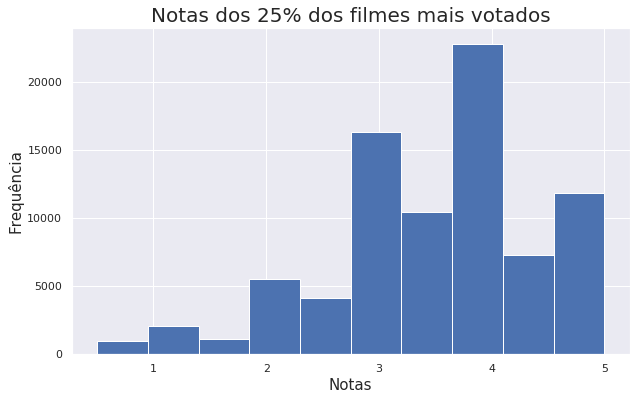

In [187]:
#@title Verificando a normalidade dos dados
plt.hist(tabela_final_filmes_mais_votados["rating"], bins = 10)
plt.title("Notas dos 25% dos filmes mais votados", size = 20)
plt.xlabel("Notas", size = 15)
plt.ylabel("Frequência", size = 15)
plt.show()

**Análise**
---
A partir do histograma, percebe-se que existe uma assimetria à esquerda e, a variação da frequência ao longo das notas é uma evidência de que os dados podem não ter distribuição normal.

In [188]:
#@title Teste numérico de normalidade
stat, p = normaltest(tabela_final_filmes_mais_votados["rating"])
print("p-valor: {}".format(round(p,3)))
print("Estatística do teste: {}".format(round(stat)))

p-valor: 0.0
Estatística do teste: 5359.0


**Análise**
***
Com base no p-value, deve-se descartar a hipótese de que as nostas possuem distribuição normal.

A partir das conclusões anteriores, a alternativa que nos resta para testar as médias das notas é o teste não-paramétrico de Wilcoxon.

****
**Teste de Wilcoxson**


O teste estatístico de Wilcoxon avalia se duas amostras provém da mesma distribuição. Se o resultado do teste indicar que as amostras não provém da mesma distribuição, vamos comparar as médias e medianas dos grupos para avaliar qual é a maior.

In [189]:
#@title Separando os dados dos 75% dos filmes menos votados
filtro_filmes_menos_votados = tabela_final["qtd_avaliacoes"] < tabela_final["qtd_avaliacoes"].quantile(0.75)
filmes_menos_votados = tabela_final[filtro_filmes_menos_votados]

# Selecionando os filmes menos votados da tabela de Ratings
indices_dos_filmes_menos_votados = filmes_menos_votados["movieId"]
segundo_filtro_filmes_menos_votados = ratings["movieId"].isin(indices_dos_filmes_menos_votados)
filmes_menos_votados_final = ratings[segundo_filtro_filmes_menos_votados]

# Unindo as tabelas de Filmes mais votados com a tabela Movies (Para unir as avaliações com os nomes dos filmes)
tabela_final_filmes_menos_votados = pd.merge(filmes_menos_votados_final, movies, left_on="movieId", right_on="movieId", how = "inner")

# Avaliando o resultado da filtragem
qtde_filmes_menos_votados = tabela_final_filmes_menos_votados["movieId"].drop_duplicates().count()
print("-----------------------------------------------------------------------")
print("Foram selecionados {} de {} filmes".format(qtde_filmes_menos_votados, numero_de_filmes_avaliados))
print("Ao todos, são {} filmes mais votados, {} menos votados, somando um total de {} filmes".format(qtde_filmes_mais_votados, qtde_filmes_menos_votados, numero_de_filmes_avaliados))
print("-----------------------------------------------------------------------")

# Tabela final de filmes menos votados
tabela_final_filmes_menos_votados.head(10)

-----------------------------------------------------------------------
Foram selecionados 7283 de 9724 filmes
Ao todos, são 2441 filmes mais votados, 7283 menos votados, somando um total de 9724 filmes
-----------------------------------------------------------------------


,userId,movieId,rating,timestamp,title,genres
0,1,804,4.0,964980499,She's the One (1996),Comedy|Romance
1,51,804,5.0,1230931511,She's the One (1996),Comedy|Romance
2,113,804,3.0,980051922,She's the One (1996),Comedy|Romance
3,117,804,3.0,844163929,She's the One (1996),Comedy|Romance
4,414,804,3.0,961439308,She's the One (1996),Comedy|Romance
5,489,804,2.0,1333831977,She's the One (1996),Comedy|Romance
6,555,804,4.0,978744726,She's the One (1996),Comedy|Romance
7,603,804,2.0,963178746,She's the One (1996),Comedy|Romance
8,1,940,5.0,964982176,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance
9,57,940,4.0,969753691,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance


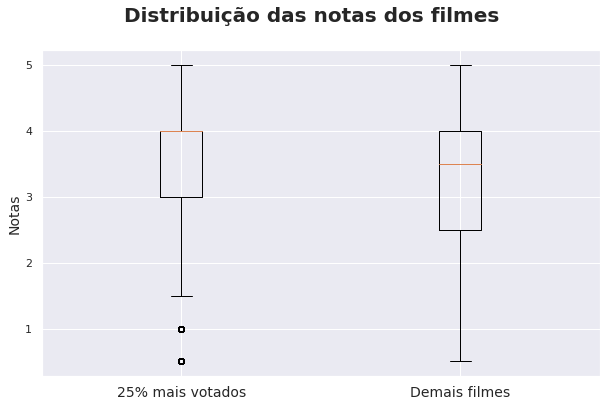

p-valor: 0.0
estatistica: 41.15


In [190]:
#@title Boxplot - Notas dos filmes

notas_dos_filmes_mais_votados = tabela_final_filmes_mais_votados["rating"]
notas_dos_filmes_menos_votados = tabela_final_filmes_menos_votados["rating"]

plt.boxplot([notas_dos_filmes_mais_votados, notas_dos_filmes_menos_votados])
plt.suptitle("Distribuição das notas dos filmes", fontweight='bold', size = 20)
plt.ylabel("Notas", size = 14)
plt.xticks([1,2],["25% mais votados","Demais filmes"], size = 14)
plt.show()

#@title Teste de Wilcoxon para comparação das amostras
estatistica, p = ranksums(notas_dos_filmes_mais_votados, notas_dos_filmes_menos_votados)
print("p-valor: {}".format(round(p,2)))
print("estatistica: {}".format(round(estatistica,2)))

**Análise**
---
A partir do p-valor gerado pelo teste de Wilcoxon pode-se rejeitar a hipótese de igualdade das amostras.

O próprio boxplot já mostra a diferença entre os dois conjuntos de dados. É possível verificar por meio do gráfico que a maioria das notas dos 25% dos filmes mais avaliados está entre 3 e 4, enquanto que no outro conjunto de filmes, a variação é maior, indo de 2,5 à 4.

Para ter uma ideia melhor de como os dados estão distribuidos, vamos avaliar as estatísticas de posição e dispersão de ambos os conjuntos.

In [191]:
#@title Estatísticas descritivas de ambos os conjunto de dados
metricas = {'Filmes mais votados':[
    notas_dos_filmes_mais_votados.quantile(0.5),
    round(notas_dos_filmes_mais_votados.mean(),2),
    round(notas_dos_filmes_mais_votados.std(),2),
    round(notas_dos_filmes_mais_votados.std()/notas_dos_filmes_mais_votados.mean(),2)],
    'Filmes menos votados':[notas_dos_filmes_mais_votados.quantile(0.5),
    round(notas_dos_filmes_menos_votados.mean(),2),
    round(notas_dos_filmes_menos_votados.std(),2),
    round(notas_dos_filmes_menos_votados.std()/notas_dos_filmes_menos_votados.mean(),2)]}

# Gerando as estatísticas descritivas
tabela_metricas = pd.DataFrame(metricas)
tabela_metricas = tabela_metricas.rename(index={0:'Média',1:'Mediana',2:'Desvio Padrão',3:'Coeficiente de variação'})
tabela_metricas

,Filmes mais votados,Filmes menos votados
Média,4.00,4.00
Mediana,3.57,3.20
Desvio Padrão,1.02,1.09
Coeficiente de variação,0.29,0.34


**Análise**

---

Apesar do teste de Wilcoxon ter apresentado evidências de que os dados apresentam diferenças entre suas distribuições, percebe-se a partir da tabela de estatísticas descritivas, que suas medidas de posição e dispersão estão muito próximas umas das outras. As diferenças estão nos valores das medianas e de coeficiente de variação. 

Os filmes mais votados possuem nota mediana superior aos menos votados e menor variabilidade. 

Entretando, para avaliadores mais conservadores, mesmo que o teste estatístico aponte a diferença e a mediana dos filmes mais novos seja superior, talvez essas análises não sejam suficientes. Além disso, os tamanhos das amostras é um fator que pode ter influenciado no teste, pois em muitas bibliografias, o teste de Wilcoxon é conhecido como teste para amostras pareadas.

Portanto, para encerrar esse tópico da análise, colocarei como inconclusiva a hipótese de que os filmes com maior engajamento do público são também os que possuem maiores notas.

Vamos agora, para a próxima hipótese de que os filmes mais votados são de gêneros específicos.

# O Genero dos filmes mais queridos pela audiência


**Análise**
---
Para fazer a avaliação dos gêneros mais frequêntes em cada filmes, primeiramente serão extraídos as colunas de filmes e gêneros. Depois disso iremos passar uma função para tirar a duplicidade dos dados gerado pela ocorrência de notas dos usuários que votaram

In [192]:
#@title Preparando a base de gêneros dos filmes mais votados

# Extraindo as colunas MovieId, Title e genres
filmes_mais_votados = tabela_final_filmes_mais_votados[["movieId","title","genres"]]
filmes_mais_votados = tabela_final_filmes_mais_votados.drop_duplicates(subset="movieId")

# Checagem dos resultados
print("Quantidade de filmes mais votados: {}".format(len(filmes_mais_votados)))
print("Proporção de filmes mais votados: {}%".format(round(100*len(filmes_mais_votados)/numero_de_filmes_avaliados,2)))
filmes_mais_votados.head()

Quantidade de filmes mais votados: 2441
Proporção de filmes mais votados: 25.1%


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [193]:
#@title  Preparando a base de gêneros dos filmes menos votados

# Extraindo as collunas de interesse
filmes_menos_votados = tabela_final_filmes_menos_votados[["movieId","title","genres"]]
# Tirando os valores duplicados
filmes_menos_votados = filmes_menos_votados.drop_duplicates(subset = "movieId")

# Checagem dos resultados
print("Quantidade de filmes mais votados: {}".format(len(filmes_menos_votados)))
print("Proporção de filmes mais votados: {}%".format(round(100*len(filmes_menos_votados)/numero_de_filmes_avaliados,2)))
filmes_menos_votados.head()

Quantidade de filmes mais votados: 7283
Proporção de filmes mais votados: 74.9%


,movieId,title,genres
0,804,She's the One (1996),Comedy|Romance
8,940,"Adventures of Robin Hood, The (1938)",Action|Adventure|Romance
16,943,"Ghost and Mrs. Muir, The (1947)",Drama|Fantasy|Romance
23,1024,"Three Caballeros, The (1945)",Animation|Children|Musical
29,1226,"Quiet Man, The (1952)",Drama|Romance


In [194]:
#@title Preparando a tabela para a sumarização de todos os gêneros
todos_os_generos = movies["genres"].str.get_dummies()
todos_os_generos = todos_os_generos.sum(axis=0)
todos_os_generos = todos_os_generos.reset_index()
todos_os_generos.columns = ["Gêneros", "Freq. Total"]
todos_os_generos.head()

,Gêneros,Freq. Total
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664


In [195]:
#@title Contagem dos gêneros dos filmes mais votados
# Transformando os gêneros em dummies
generos_filmes_mais_votados = filmes_mais_votados["genres"].str.get_dummies()

# Somando os gêneros dos filmes mais votados
soma_filmes_mais_votados = generos_filmes_mais_votados.sum(axis=0)
soma_filmes_mais_votados = pd.DataFrame({'Gêneros':soma_filmes_mais_votados})
soma_filmes_mais_votados = soma_filmes_mais_votados.sort_values(by=['Gêneros'], ascending = False)
soma_filmes_mais_votados

# Concatenando os valores na tabela geral
todos_os_generos_v2 = pd.merge(todos_os_generos, soma_filmes_mais_votados, left_on = "Gêneros", right_index=True, how="left")
todos_os_generos_v2.columns = ["Gêneros", "Total", "Mais votados"]
todos_os_generos_v2.head()

# Substituindo os valores Nan por zeros
todos_os_generos_v3 = todos_os_generos_v2.fillna(0)
todos_os_generos_v3.head()

,Gêneros,Total,Mais votados
0,(no genres listed),34,0.0
1,Action,1828,693.0
2,Adventure,1263,523.0
3,Animation,611,164.0
4,Children,664,226.0


In [196]:
#@title Adicionando as colunas de frequência relativa
todos_os_generos_v3["% Mais Votados"] = round(todos_os_generos_v3["Mais votados"] / todos_os_generos_v3["Total"],3)
todos_os_generos_v3["% Total"] = todos_os_generos_v3["Total"] / todos_os_generos_v3["Total"]
todos_os_generos_v3 = todos_os_generos_v3.sort_values(by = "% Mais Votados", ascending = False)
todos_os_generos_v3

,Gêneros,Total,Mais votados,% Mais Votados,% Total
12,IMAX,158,93.0,0.589,1.0
2,Adventure,1263,523.0,0.414,1.0
16,Sci-Fi,980,376.0,0.384,1.0
1,Action,1828,693.0,0.379,1.0
9,Fantasy,779,281.0,0.361,1.0
4,Children,664,226.0,0.340,1.0
17,Thriller,1894,636.0,0.336,1.0
14,Mystery,573,187.0,0.326,1.0
6,Crime,1199,359.0,0.299,1.0
13,Musical,334,99.0,0.296,1.0


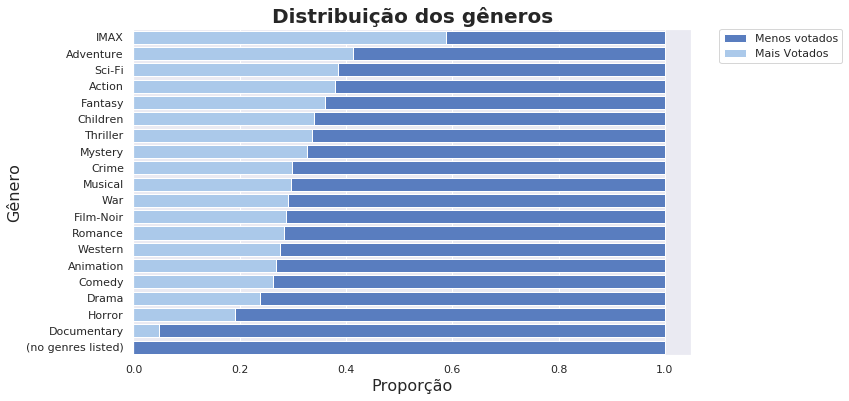

In [197]:
#@title Gráfico de baras para a proporção de engajamento dos usuários para cada gênero
#Plotando o gráfico
#f, ax = plt.subplots(figsize=(15, 5))

sns.set_color_codes("muted")
sns.barplot(y = "Gêneros", x = "% Total", data = todos_os_generos_v3,
            label="Menos votados", color="b")


sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(y = "Gêneros", x = "% Mais Votados", data = todos_os_generos_v3, 
            label="Mais Votados",color = "b")


plt.title("Distribuição dos gêneros", fontweight='bold', size = 20)
plt.xlabel("Proporção", size = 16)
plt.ylabel("Gênero", size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Análise**

---
Com base no gráfico de barras, verifica-se que quase 60% dos filmes mais votados são IMAX. Além disso, nota-se que os Gênros Documentário, Horror e Drama apresentam o menor número de engajamento.

Logo, percebe-se que o gênero é um fator que parece influenciar muito no engajamento dos avaliadores dos filmes.

# Conclusão


---


1. Os filmes mais votados possuem maiores notas?

Conforme foi verificado, esse argumento não é necessariamente verdadeiro, apesar dos 25% dos filmes mais votados apresentarem valor de mediana superior aos demais. 

Conforme vimos, o teste de Wilcoxon gerou evidências de que os filmes mais votados apresentam notas distintas dos demais. Entranto, quando avaliamos o Boxplot dos valores e as estatísticas de posição e dispersão, não verifica-se muita diferença.

Talvez o fato de haver grupos de tamanhos diferentes, pode ter influenciado o resultado final do teste.

Sendo assim, essa hipótese foi inconclusiva.


---

2. O maior engajamento dos filmes ocorre para gêneros específicos?

Conforme vimos na tabela e no gráfico de barras, com as frequências relativas, nota-se que os filmes com maior engajamento são IMAX. Além disso, aqueles com menor engajamento, ou não apresentam Gênero, ou são Documentário, Horror ou Drama.

A partir dessas envidências, parece que o Gênero do filmes influencia sim no nível de engajamento dos avaliadores.

Poderíamos aplicar teste de hipótese para a proporção para dar continuidade a discussão, mas o estudo ficaria longo demais. Logo encerraremos por aqui.
"""